In [1]:
import numpy as np
import pyqentangle

In [2]:
from scipy.stats import norm

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
fn1 = lambda x1, x2: np.sqrt(0.7)*norm.pdf(x1/0.5)*norm.pdf(x2/0.3)+np.sqrt(0.3)*norm.pdf((x1-5.)/0.5)*norm.pdf((x2-6.)/0.2)

In [5]:
modes = pyqentangle.continuous_schmidt_decomposition(fn1, nb_x1=200, nb_x2=200, x1_lo=-10., x1_hi=10., x2_lo=-10., x2_hi=10., keep=10)

//anaconda/lib/python2.7/site-packages/pyqentangle/schmidt.py:83: RuntimeWarning: invalid value encountered in sqrt
  for k in range(mindim)]


In [6]:
x = np.linspace(-10., 10., 100)

//anaconda/lib/python2.7/site-packages/pyqentangle/continuous.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  return numerical_continuous_interpolation_nocheck_cython(xarray, yarray, x)
//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


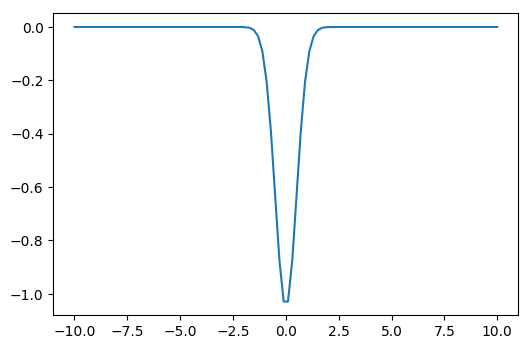

In [7]:
plt.plot(x, modes[0][1](x))

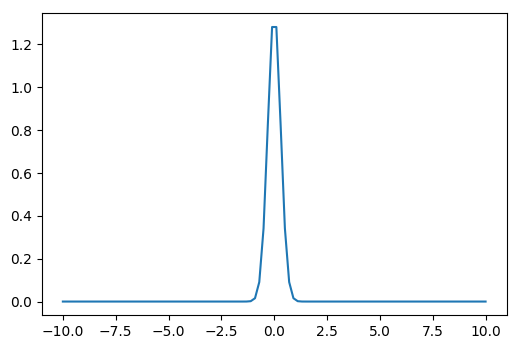

In [8]:
plt.plot(x, modes[0][2](x))

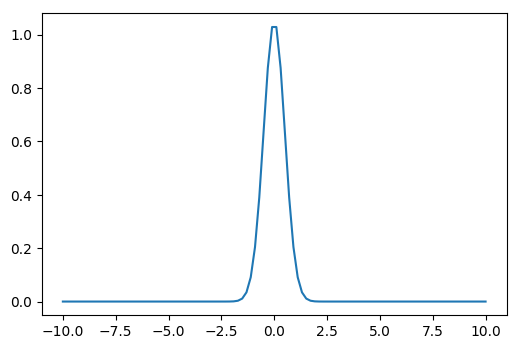

In [9]:
plt.plot(x, modes[1][1](x))

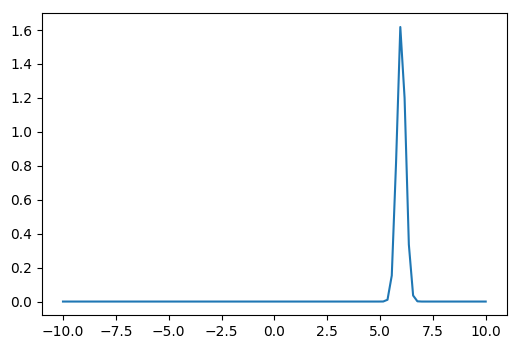

In [10]:
plt.plot(x, modes[1][2](x))

In [11]:
modes[0][0]

0.7777777777777783

In [12]:
modes[1][0]

0.22222222222222182

In [17]:
fn1(6., 6.)

0.011797549146026622

In [25]:
modes[0][2](np.array([0]))

array([1.35225708])

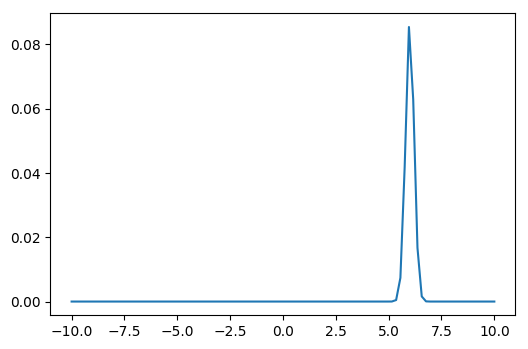

In [31]:
plt.plot(x, fn1(5., x))